In [1]:
# set up imports
import pandas as pd, numpy as np, seaborn as sns
from tabulate import tabulate
import statsmodels
import arch
import matplotlib
matplotlib.use('qt5agg')

# configure plot style
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (15,2.5)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.8
save_plot_to =  r'C:\\Users\joche\OneDrive\03 TUM - TUM-BWL\Semester 8\01 Bachelorarbeit\04 Results\Plots/'

In [2]:
# load data: new_btc.txt, created with M4
index_name = 'date'
btc = pd.read_csv('Data/btc_new.txt', index_col=0)
btc.index = pd.DatetimeIndex(btc.index, normalize=True).normalize()
btc

,btc
date,
2015-08-07,279.58
2015-08-10,264.47
2015-08-11,270.39
2015-08-12,266.38
2015-08-13,264.08
...,...
2020-06-18,9411.84
2020-06-19,9288.02
2020-06-22,9648.72


In [3]:
# split data in pre and post bubble 2018
pre_bubble_end_date = '2017-12-01'
post_bubble_start_date = '2018-02-01'

# pre bubble df
btc_pre = btc[:pre_bubble_end_date]

# post bubble df
btc_post = btc[post_bubble_start_date:]

In [4]:
### RUN TO DEFINE ALL FUNCTIONS ###

# define overview-printing function of dataframe
def dates_overview(dataframe):
    print('start_date:\t', dataframe.index[0])
    print('end_date:\t', dataframe.index[-1])
    print('len df:\t\t', len(dataframe))
    
# define train/test-splitting function of dataframe
def split_traintest_df(dataframe):
    train_size = int(len(dataframe) * 0.8)
    df_train, df_test = dataframe[0:train_size], dataframe[train_size:]
    # create dataframe for printout
    data = {'Dataframe': ['dataframe', 'df_train', 'df_test'],
            'date_start': [dataframe.index[0], df_train.index[0], df_test.index[0]],
            'date_end': [dataframe.index[-1], df_train.index[-1], df_test.index[-1]],
            'nobs': [len(dataframe), len(df_train), len(df_test)]}
    df_print = pd.DataFrame(data, columns=['Dataframe','date_start','date_end','nobs'])
    print(df_print)
    return df_train, df_test

# define naive forecast function for a dataframe
from sklearn.metrics import mean_squared_error as mse
def naive_forecast(dataframe):
    # create train and test dataframes
    train_size = int(len(dataframe) * 0.8)
    dataframe_train, dataframe_test = dataframe[0:train_size], dataframe[train_size:]
    index = len(dataframe_train) - 1
    pred_val_btc = list()
    # rolling forecast: (yt = yt-1)
    for i in range(len(dataframe_test)):
        yhat_btc = dataframe.iloc[:,0][index+i]
        pred_val_btc.append(yhat_btc)
    # return [0]: mse, [1]: btc predictions
    return np.sqrt(mse(dataframe_test.iloc[:,0].values,pred_val_btc)), pred_val_btc

# define series-generating and plotting function for dataframe btc_pred_result
def plot_btc_pred_result(dataframe, dataframe_train, dataframe_test, dataframe_btc_pred_result):
    # make series for plotting pred. vs. actual
    index_pred = np.arange(len(dataframe_train) + 1, len(dataframe) + 1)
    pred_val_btc_series = pd.Series(dataframe_btc_pred_result[1], index=index_pred)
    test_series_btc = pd.Series(dataframe_test.iloc[:,0].values, index=index_pred)
    # create plot
    fig, axs = plt.subplots(1,2)
    axs[0].plot(dataframe_train.iloc[:,0].values, label= r'$btc_T$', color='black')
    axs[0].plot(test_series_btc, label= r'$btc_{T+h}$', color='green')
    axs[0].plot(pred_val_btc_series, label= r'$\hat{btc}_{T+h}$', color= 'red')
    axs[0].legend(loc='upper left')
    axs[0].title.set_text('Gesamter Zeitraum')
    axs[1].plot(test_series_btc, label= r'$btc_{T+h}$', color='green')
    axs[1].plot(pred_val_btc_series, label= r'$\hat{btc}_{T+h}$', color= 'red')
    axs[1].legend(loc='upper left')
    axs[1].title.set_text('Vorhersage-Zeitraum')
    #fig.suptitle('Naive Einschrittprognose btc')
    fig.set_size_inches(15,2.5)
    return fig

In [5]:
# print out dates overview for btc
dates_overview(btc)

start_date:	 2015-08-07 00:00:00
end_date:	 2020-06-24 00:00:00
len df:		 1112


In [6]:
# print out dates overview for btc_pre
dates_overview(btc_pre)

start_date:	 2015-08-07 00:00:00
end_date:	 2017-12-01 00:00:00
len df:		 533


In [7]:
# print out dates overview for btc_post
dates_overview(btc_post)

start_date:	 2018-02-01 00:00:00
end_date:	 2020-06-24 00:00:00
len df:		 540


In [8]:
# split btc in train and test data and print overview
btc_train, btc_test = split_traintest_df(btc)

   Dataframe date_start   date_end  nobs
0  dataframe 2015-08-07 2020-06-24  1112
1   df_train 2015-08-07 2019-07-01   889
2    df_test 2019-07-02 2020-06-24   223


In [9]:
# split btc_pre in train and test data and print overview
btc_pre_train, btc_pre_test = split_traintest_df(btc_pre)

   Dataframe date_start   date_end  nobs
0  dataframe 2015-08-07 2017-12-01   533
1   df_train 2015-08-07 2017-06-16   426
2    df_test 2017-06-19 2017-12-01   107


In [10]:
# split btc_post in train and test data and print overview
btc_post_train, btc_post_test = split_traintest_df(btc_post)

   Dataframe date_start   date_end  nobs
0  dataframe 2018-02-01 2020-06-24   540
1   df_train 2018-02-01 2019-12-31   432
2    df_test 2020-01-02 2020-06-24   108


In [11]:
# obtain results from naive forecast for btc
btc_pred_result = naive_forecast(btc)

In [12]:
# obtain results from naive forecast for btc_pre
btc_pre_pred_result = naive_forecast(btc_pre)

In [13]:
# obtain results from naive forecast for btc_post
btc_post_pred_result = naive_forecast(btc_post)

In [14]:
# print out mse for btc prediction vs. actual
print('MSE:\t', btc_pred_result[0])

MSE:	 431.0703047931271


In [15]:
# print out mse for btc_pre prediction vs. actual
print('MSE_pre:\t', btc_pre_pred_result[0])

MSE_pre:	 303.7457068717032


In [16]:
# print out mse for btc_post prediction vs. actual
print('MSE_post:\t', btc_post_pred_result[0])

MSE_post:	 460.43467173944975


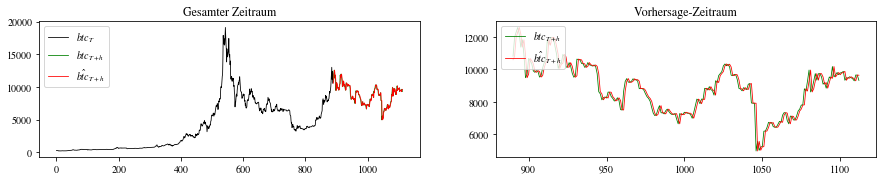

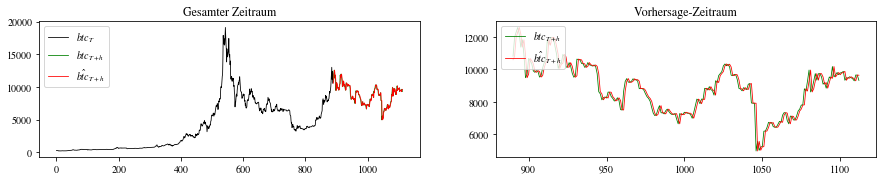

In [17]:
# fig_1: plot prediction vs. actual for btc
fig_1 = plot_btc_pred_result(btc,btc_train,btc_test,btc_pred_result)
fig_1

In [ ]:
# save fig_1
fig_1.savefig(save_plot_to+'M1_fig_1.svg',format='svg',bbox_inches='tight',pad_inches = 0)

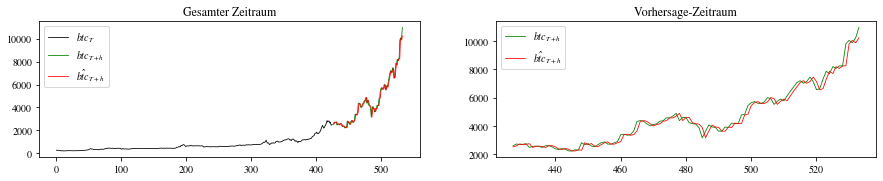

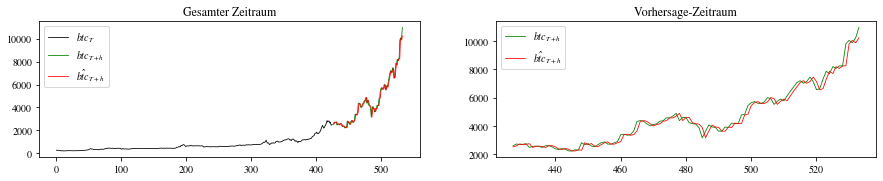

In [18]:
# fig_1_pre: plot prediction vs. actual for btc_pre
fig_1_pre = plot_btc_pred_result(btc_pre,btc_pre_train,btc_pre_test,btc_pre_pred_result)
fig_1_pre

In [16]:
# save fig_1_pre
fig_1_pre.savefig(save_plot_to+'M1_pre_fig_1.svg',format='svg',bbox_inches='tight',pad_inches = 0)

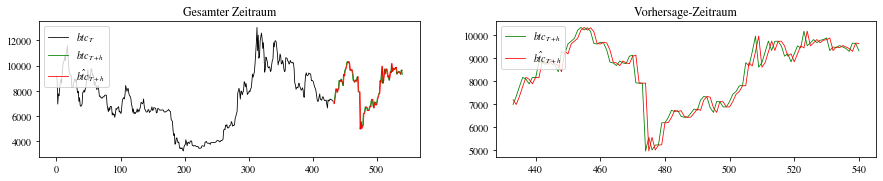

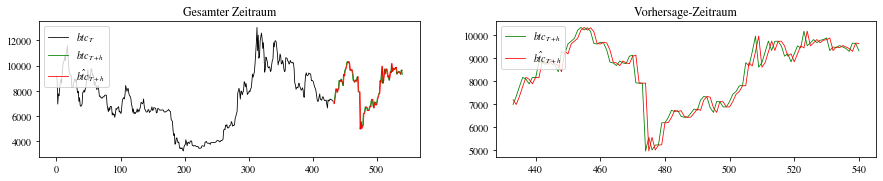

In [19]:
# fig_1: plot prediction vs. actual for btc_post
fig_1_post = plot_btc_pred_result(btc_post,btc_post_train,btc_post_test,btc_post_pred_result)
fig_1_post

In [18]:
# save fig_1_post
fig_1_post.savefig(save_plot_to+'M1_post_fig_1.svg',format='svg',bbox_inches='tight',pad_inches = 0)
